<a href="https://colab.research.google.com/github/SayedZaidAbdulAhaad/Web-Scrapping-Python-/blob/main/Copy_of_Numerical_Programming_in_Python_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import datetime as df

## **Scrapping Movies Data**

In [ ]:
# def fetch_movie_urls(url):
#     headers = {
#         'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
#     }
#     response = requests.get(url, headers=headers)
#     if response.status_code != 200:
#         return "Failed to retrieve the page, status code:", response.status_code
#     soup = BeautifulSoup(response.text, 'html.parser')
#     return soup


# url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
# soup=fetch_movie_urls(url)
# print(soup.prettify())

## Hint : Use the following code to extract the film urls
# movie_links = soup.find_all('a', href=True)
# movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]

# url_list=[]
# for x in movie_urls:
#   url_list.append('https://www.justwatch.com'+x)

In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here


headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}           # Defining Headers to avoid Unnecessary Errors
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'                                                                                        # URL for the List of Movies
response = requests.get(url, headers=headers)                                                                                                             # Requesting for the URL using headers from the Website
soup = BeautifulSoup(response.text, 'html.parser')                                                                                                        # Storing the Reqested HTML content in 'soup' variable


movie_urls = []

for x in soup.find_all('a',class_="title-list-grid__item--link"):                                       # Iterating through all the 'a' tags of class 'title-list-grid__item--link' to capture URLS after inspecting the Web page
  movie_urls.append('https://www.justwatch.com'+ x['href'])                                             # Appending Captured URls in previously created empty list

movie_urls = movie_urls[0:100]                                                                          # Limiting list to 100 URLs
print(movie_urls)
print(len(movie_urls))


['https://www.justwatch.com/in/movie/lucky-baskhar', 'https://www.justwatch.com/in/movie/bhool-bhulaiyaa-3', 'https://www.justwatch.com/in/movie/pushpa-the-rule-part-2', 'https://www.justwatch.com/in/movie/deadpool-3', 'https://www.justwatch.com/in/movie/ntr-30', 'https://www.justwatch.com/in/movie/kishkkindha-kandam', 'https://www.justwatch.com/in/movie/stree-2', 'https://www.justwatch.com/in/movie/amaran-2024', 'https://www.justwatch.com/in/movie/the-substance', 'https://www.justwatch.com/in/movie/venom-3-2024', 'https://www.justwatch.com/in/movie/all-we-imagine-as-light', 'https://www.justwatch.com/in/movie/pushpa', 'https://www.justwatch.com/in/movie/vettaiyan', 'https://www.justwatch.com/in/movie/bagheera-2024', 'https://www.justwatch.com/in/movie/kanguva', 'https://www.justwatch.com/in/movie/gladiator', 'https://www.justwatch.com/in/movie/martin', 'https://www.justwatch.com/in/movie/alien-romulus', 'https://www.justwatch.com/in/movie/singham-again-2024-0', 'https://www.justwatch.

## **Scrapping Movie Title**

In [ ]:
# Write Your Code here


movie_title = []

for url in movie_urls:                                                                  # Iterating through fetched URL's to scrap the Tittle of the movies
  content = requests.get(url, headers=headers)                                          # Storing requests to get the HTML content with specified headers content variable
  soup = BeautifulSoup(content.text, 'html.parser' )                                    # Storing fetched HTML content
  title = soup.find_all('h1')[0].text.rsplit(" (", 1)[0].strip()                        # Iterating through 'h1' tags in the HTML to fetch the Title of Movies
  movie_title.append(title)                                                             # Appending captured Title from URLs in previously created empty list

print(movie_title)
print(len(movie_title))



['Lucky Baskhar', 'Bhool Bhulaiyaa 3', 'Pushpa 2 - The Rule', 'Deadpool & Wolverine', 'Devara Part 1', 'Kishkindha Kaandam', 'Stree 2: Sarkate Ka Aatank', 'Amaran', 'The Substance', 'Venom: The Last Dance', 'All We Imagine as Light', 'Pushpa: The Rise', 'Vettaiyan', 'Bagheera', 'Kanguva', 'Gladiator', 'Martin', 'Alien: Romulus', 'Singham Again', 'The Wild Robot', 'Meiyazhagan', 'A.R.M', 'Vicky Vidya Ka Woh Wala Video', 'Black', 'The Sabarmati Report', 'Siddharth Roy', 'A Quiet Place: Day One', 'Sikandar Ka Muqaddar', 'Do Patti', 'Lubber Pandhu', 'Tumbbad', 'Smile 2', 'Oldboy', 'Bhool Bhulaiyaa 2', 'Red One', '365 Days', 'Jigra', 'The Buckingham Murders', 'Kill', 'Furiosa: A Mad Max Saga', 'Kalki 2898 AD', 'Gladiator II', 'Transformers One', 'Thangalaan', 'KA', 'My Old Ass', 'Solo Leveling -ReAwakening-', 'The Promised Land', 'Bloody Beggar', 'Yudhra', 'Caddo Lake', 'Naughty', 'Sookshma Darshini', 'Khel Khel Mein', 'Mangalavaaram', 'Salaar', 'Animal', 'Longlegs', 'Maa Nanna Superhero', 

## **Scrapping release Year**

In [ ]:
# Write Your Code here

movie_year = []

for url in movie_urls:                                                                 # Iterating through the captured URLs in the HTML files
  content = requests.get(url, headers = headers)
  soup = BeautifulSoup(content.text, 'html.parser' )
  year = soup.find_all('span', class_ = 'release-year')[0].text.strip('()')            # looking for 'span' tags with class 'release-year' to scrap Movie release years after inspecting the Web page
  movie_year.append(year)                                                              # Appending the scrapped year in the empty list

movie_year = [int(i) for i in movie_year]                                              # Converting the Movie Years in list from string to Integer for easy Data Wrangling
print(movie_year)
print(len(movie_year))



[2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2021, 2024, 2024, 2024, 2000, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2018, 2024, 2003, 2022, 2024, 2020, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2023, 2024, 2024, 2024, 2023, 2024, 2024, 2023, 2023, 2023, 2024, 2024, 2024, 2024, 2024, 2013, 2024, 2024, 2024, 2024, 2016, 2018, 2018, 2024, 2019, 2021, 2018, 2024, 2015, 2024, 2024, 2015, 2024, 2018, 2023, 2024, 2019, 2023, 2007, 2024, 2023, 2024, 2018, 2001, 2024, 2024, 2022, 2022, 2024, 2024, 2015, 2018, 2024]
100


## **Scrapping Genres**

In [ ]:
# Write Your Code here

movie_genres = []

for url in movie_urls:                                                           # Iterating through the captured URLs in the HTML files
  try:                                                                           # Handling Error with Try- Except Block
    content = requests.get(url, headers = headers)
    soup = BeautifulSoup(content.text, 'html.parser')
    for genres in soup.find_all('div', class_= 'detail-infos'):                  # Iterating through all the 'div' tags with class 'detail-infos' to look for Genres
      if genres.find_all('h3')[0].text == 'Genres':
        # genres = genres.find_all('span')[0].text
        movie_genres.append(genres.find_all('div')[0].text)                      # when Found, Iterating through 'div' tags to extract text containing genres
        break
  except:
    genres.append('NA')                                                          # When Error occurrs appending 'NA' as a missiing value

print(movie_genres)
print(len(movie_genres))



['Crime, Drama, Mystery & Thriller', 'Horror, Comedy', 'Action & Adventure, Mystery & Thriller, Crime, Drama', 'Action & Adventure, Comedy, Science-Fiction', 'Action & Adventure, Drama, Mystery & Thriller', 'Drama, Mystery & Thriller', 'Comedy, Horror', 'Action & Adventure, Drama, War & Military', 'Horror, Science-Fiction, Drama', 'Action & Adventure, Science-Fiction, Mystery & Thriller', 'Drama, Romance', 'Action & Adventure, Drama, Mystery & Thriller, Crime', 'Drama, Action & Adventure, Crime', 'Action & Adventure', 'Mystery & Thriller, Action & Adventure, Drama, Fantasy', 'Drama, Action & Adventure', 'Action & Adventure, Drama, Mystery & Thriller', 'Horror, Science-Fiction, Mystery & Thriller', 'Drama, Action & Adventure', 'Animation, Science-Fiction', 'Drama, Kids & Family', 'Action & Adventure, Drama, Comedy', 'Comedy', 'Mystery & Thriller, Science-Fiction, Horror', 'Drama, Mystery & Thriller', 'Drama, Romance', 'Science-Fiction, Mystery & Thriller, Drama, Horror', 'Mystery & Thri

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here

imdb_rating = []

for url in movie_urls:                                                                                         # Iterating through the captured URLs in the HTML files
  content = requests.get(url, headers = headers)
  soup5 = BeautifulSoup(content.text, 'html.parser')
  for x in soup5.find_all('div', class_ = 'detail-infos'):                                                     # Iterating through all the 'div' tags with class 'detail-infos' to look for Rating after Inspecting the page
    if x.find_all('h3')[0].text == 'Rating':                                                                   # Checking if the division(BLOCK) of HTML information is 'Rating' with if Condition
      for y in x.find_all('div',class_ ='jw-scoring-listing__rating--group jw-scoring-listing__rating--link'): # Iterating through the anothe 'div' tag after inspecting
        imdb_rating.append((y.find_all('div')[0].text[0:3].strip("''")))                                       # iterating more through the selected 'div' tag to scrap relevant info in text form with .text method and then appending the info to empty list

imdb_rating = imdb_rating[0:100]
imdb_rating = [float(i) for i in imdb_rating]                                                                  # Converting the Movie Rating in list from string to float for easy Data Wrangling
print(imdb_rating)
print(len(imdb_rating))

[8.1, 8.1, 7.7, 7.7, 6.1, 6.1, 8.1, 8.1, 7.0, 7.0, 8.4, 8.4, 7.4, 7.4, 7.6, 7.6, 7.1, 7.1, 6.9, 6.9, 5.0, 5.0, 8.5, 8.5, 2.4, 2.4, 7.1, 7.1, 8.4, 8.4, 7.2, 7.2, 5.4, 5.4, 7.1, 7.1, 6.6, 6.6, 6.3, 6.3, 6.1, 6.1, 6.5, 6.5, 8.2, 8.2, 8.3, 8.3, 5.7, 5.7, 3.3, 3.3, 6.5, 6.5, 6.0, 6.0, 7.6, 7.6, 7.5, 7.5, 7.1, 7.1, 7.0, 7.0, 7.0, 7.0, 7.7, 7.7, 6.2, 6.2, 5.2, 5.2, 6.9, 6.9, 6.5, 6.5, 6.8, 6.8, 6.6, 6.6, 6.1, 6.1, 6.7, 6.7, 6.7, 6.7, 7.2, 7.2, 5.8, 5.8, 7.1, 7.1, 8.2, 8.2, 6.4, 6.4, 6.5, 6.5, 7.0, 7.0]
100


## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here

movie_runtimes = []

for url in movie_urls:                                                      # Iterating through the captured URLs in the HTML files
  content = requests.get(url, headers = headers)
  soup6 = BeautifulSoup(content.text, 'html.parser')
  for x in soup6.find_all('div', class_ = 'detail-infos'):                  # Iterating through all the 'div' tags with class 'detail-infos' to look for Durating information after Inspecting the page
    if x.find_all('h3')[0].text == 'Runtime':                               # Checking if the division(BLOCK) of HTML information is 'Runtime' with if Condition
      for y in x.find_all('div', class_= 'detail-infos__value'):            # Iterating through the anothe 'div' tag after inspecting
        movie_runtimes.append(y.text)                                       # appending relevant information

movie_runtimes = movie_runtimes[0:100]
print(movie_runtimes)
print(len(movie_runtimes))


['2h 50min', '2h 50min', '2h 38min', '2h 38min', '3h 18min', '3h 18min', '2h 8min', '2h 8min', '2h 56min', '2h 56min', '2h 13min', '2h 13min', '2h 27min', '2h 27min', '2h 47min', '2h 47min', '2h 21min', '2h 21min', '1h 49min', '1h 49min', '1h 58min', '1h 58min', '2h 59min', '2h 59min', '2h 43min', '2h 43min', '2h 38min', '2h 38min', '2h 34min', '2h 34min', '2h 35min', '2h 35min', '2h 27min', '2h 27min', '1h 59min', '1h 59min', '2h 30min', '2h 30min', '1h 42min', '1h 42min', '2h 57min', '2h 57min', '2h 27min', '2h 27min', '2h 32min', '2h 32min', '2h 30min', '2h 30min', '2h 7min', '2h 7min', '2h 28min', '2h 28min', '1h 39min', '1h 39min', '2h 23min', '2h 23min', '2h 7min', '2h 7min', '2h 26min', '2h 26min', '1h 44min', '1h 44min', '2h 7min', '2h 7min', '2h 0min', '2h 0min', '2h 23min', '2h 23min', '2h 4min', '2h 4min', '1h 54min', '1h 54min', '2h 35min', '2h 35min', '1h 47min', '1h 47min', '1h 45min', '1h 45min', '2h 29min', '2h 29min', '3h 0min', '3h 0min', '2h 28min', '2h 28min', '1h 4

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here

movie_agerating = []

for url in movie_urls:                                                       # Iterating through the captured URLs in the HTML files
  content = requests.get(url, headers = headers)
  soup7 = BeautifulSoup(content.text, 'html.parser')
  for x in soup7.find_all('div', class_= 'detail-infos'):                    # Iterating through all the 'div' tags with class 'detail-infos' to look for Durating information after Inspecting the page
    if x.find_all('h3')[0].text == 'Age rating':                             # Checking if the division(BLOCK) of HTML information is 'Age rating' with if Condition
      for y in x.find_all('div', class_= 'detail-infos__value'):             # Iterating through the another 'div' tag after inspecting
        movie_agerating.append(y.text)                                       # appending relevant information

movie_agerating = movie_agerating[0:100]
print(movie_agerating)
print(len(movie_agerating))

['UA', 'UA', 'UA', 'UA', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'A', 'UA', 'UA', 'U', 'U', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'A', 'U', 'U', 'A', 'A', 'A', 'A', 'UA', 'UA', 'A', 'A', 'A', 'A', 'A', 'A', 'UA', 'UA', 'U', 'U', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'A', 'UA', 'UA', 'A', 'A', 'A', 'A', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'A', 'A', 'UA', 'UA', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'A', 'UA', 'UA', 'U', 'U', 'A', 'A', 'U', 'U']
100


## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here

movie_country = []

for url in movie_urls:                                                       # Iterating through the captured URLs in the HTML files
  content = requests.get(url, headers = headers)
  soup8 = BeautifulSoup(content.text, 'html.parser')
  for x in soup8.find_all('div', class_= 'detail-infos'):                    # Iterating through all the 'div' tags with class 'detail-infos' to look for Country information after Inspecting the page
    if x.find_all('h3')[0].text == ' Production country ':                   # Checking if the division(BLOCK) of HTML information is 'Age rating' with if Condition
        for y in x.find_all('div'):                                          # Iterating through the another 'div' tag after inspecting
          movie_country.append(y.text)                                       # Appending relevant information

movie_country = movie_country[0:100]
print(movie_country)
print(len(movie_country))


['India', 'India', 'India', 'India', 'India', 'India', 'United States', 'United States', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'United Kingdom, France', 'United Kingdom, France', 'United States', 'United States', 'Netherlands, France, India, Italy, Luxembourg', 'Netherlands, France, India, Italy, Luxembourg', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'United Kingdom, United States', 'United Kingdom, United States', 'India', 'India', 'Canada, United Kingdom, United States, Hungary, Australia, New Zealand', 'Canada, United Kingdom, United States, Hungary, Australia, New Zealand', 'India', 'India', 'Japan, United States', 'Japan, United States', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'Canada, United States, United Kingdom', 'Canada, United States, United Kingdom', 'India', 'India', 'India', 'India', 'India', 'India', 'India, Sweden', 'India, Sweden', 'United

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here

movie_stream_service = []

for url in movie_urls:                                                        # Iterating through the captured URLs in the HTML files
  content = requests.get(url, headers = headers)
  soup9 = BeautifulSoup(content.text, 'html.parser')
  for x in soup9.find_all('img', class_= 'offer__icon'):                      # Iterating through all the 'div' tags with class 'detail-infos' to look for streaming serive information after Inspecting the page
    movie_stream_service.append(x['alt'])                                     # Appending relevant information

movie_stream_service = movie_stream_service[0:100]
print(movie_stream_service)
print(len(movie_stream_service))

['Netflix', 'Bookmyshow', 'Bookmyshow', 'Bookmyshow', 'Apple TV', 'Hotstar', 'Apple TV', 'Amazon Video', 'Apple TV', 'Netflix', 'Bookmyshow', 'Hotstar', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Video', 'Netflix', 'Bookmyshow', 'MUBI', 'MUBI Amazon Channel', 'Amazon Video', 'Apple TV', 'Zee5', 'Amazon Video', 'Apple TV', 'Apple TV', 'Bookmyshow', 'Bookmyshow', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Video', 'Bookmyshow', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Video', 'Netflix', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Video', 'Bookmyshow', 'Amazon Prime Video', 'Apple TV', 'Amazon Prime Video', 'Zee5', 'Amazon Video', 'Apple TV', 'Hungama Play', 'Apple TV', 'Amazon Prime Video', 'Amazon Prime Video', 'aha', 'Apple TV', 'Hotstar', 'Apple TV', 'Amazon Video', 'Apple TV', 'Bookmyshow', 'Apple TV', 'Zee5', 'Amazon Video', 'Apple TV', 'Apple TV', 'Bookmyshow', 'Netflix', 'Hotstar', 'Netflix', 'Bookmyshow', 'Amazon Prime Video', 'Amazon Prime Vid

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here

movie_info = {'Movie URLs': movie_urls,                                       # Creating a dictionary containing all the scrapped information in thier appropriate lists
        'Title': movie_title,
        'Year': movie_year,
        'Genre': movie_genres,
        'Rating': imdb_rating,
        'Runtime': movie_runtimes,
        'Age Rating': movie_agerating,
        'Country': movie_country,
        'Stream Service': movie_stream_service}

movie_info_data = pd.DataFrame(movie_info)                                    # Creating a dataframe from the dictionary of scrapped information lists
movie_info_data

,Movie URLs,Title,Year,Genre,Rating,Runtime,Age Rating,Country,Stream Service
0,https://www.justwatch.com/in/movie/lucky-baskhar,Lucky Baskhar,2024,"Crime, Drama, Mystery & Thriller",8.1,2h 50min,UA,India,Netflix
1,https://www.justwatch.com/in/movie/bhool-bhula...,Bhool Bhulaiyaa 3,2024,"Horror, Comedy",8.1,2h 50min,UA,India,Bookmyshow
2,https://www.justwatch.com/in/movie/pushpa-the-...,Pushpa 2 - The Rule,2024,"Action & Adventure, Mystery & Thriller, Crime,...",7.7,2h 38min,UA,India,Bookmyshow
3,https://www.justwatch.com/in/movie/deadpool-3,Deadpool & Wolverine,2024,"Action & Adventure, Comedy, Science-Fiction",7.7,2h 38min,UA,India,Bookmyshow
4,https://www.justwatch.com/in/movie/ntr-30,Devara Part 1,2024,"Action & Adventure, Drama, Mystery & Thriller",6.1,3h 18min,A,India,Apple TV
...,...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/movie/woman-of-th...,Woman of the Hour,2024,"Drama, Crime",6.4,2h 7min,U,"Germany, Sweden, Denmark",Hotstar
96,https://www.justwatch.com/in/movie/joy-2024,Joy,2024,"Drama, History",6.5,2h 19min,A,India,Apple TV
97,https://www.justwatch.com/in/movie/knock-knock...,Knock Knock,2015,"Horror, Mystery & Thriller, Crime",6.5,2h 19min,A,India,Jio Cinema
98,https://www.justwatch.com/in/movie/stree,Stree,2018,"Horror, Comedy, Drama",7.0,2h 22min,U,India,Apple TV


## **Scraping TV  Show Data**

In [ ]:
# def fetch_tv_shows_urls(tv_show_url):
#   headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}
#   # Sending an HTTP GET request to the URL
#   page = requests.get(tv_show_url, headers = headers)
#   if page.status_code != 200:
#     return "Failed to retrieve the page, status code:", page.status_code
#   show_soup = BeautifulSoup(page.text, 'html.parser')
#   return show_soup


# # Specifying the URL from which tv show related data will be fetched
# tv_show_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# # Parsing the HTML content using BeautifulSoup with the 'html.parser'
# show_soup= fetch_tv_shows_urls(tv_show_url)
# # Printing the prettified HTML content
# print(soup.prettify())

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}    # Defining Headers to avoid Unnecessary Errors
tv_show_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'                                                                       # URL for the List of Shows
page = requests.get(tv_show_url, headers = headers)                                                                                                # Requesting for the URL using headers from the Website
show_soup = BeautifulSoup(page.text, 'html.parser')                                                                                                # Storing the Reqested HTML content in 'soup' variable


tv_show_urls = []

for tv_show_url in show_soup.find_all('a', class_= 'title-list-grid__item--link'):                           # Iterating through all the 'a' tags of class 'title-list-grid__item--link' to capture URLS after inspecting the Web page
  tv_show_urls.append('https://www.justwatch.com'+ tv_show_url['href'])                                      # Appending Captured URls in previously created empty list


tv_show_urls = tv_show_urls[0:100]                                                                           # Limiting list to 100 URLs
print(tv_show_urls)
print(len(tv_show_urls))





['https://www.justwatch.com/in/tv-show/from', 'https://www.justwatch.com/in/tv-show/thukra-ke-mera-pyaar', 'https://www.justwatch.com/in/tv-show/the-day-of-the-jackal', 'https://www.justwatch.com/in/tv-show/the-penguin', 'https://www.justwatch.com/in/tv-show/dune-the-sisterhood', 'https://www.justwatch.com/in/tv-show/citadel-honey-bunny', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/these-black-black-eyes', 'https://www.justwatch.com/in/tv-show/arcane', 'https://www.justwatch.com/in/tv-show/the-pradeeps-of-pittsburgh', 'https://www.justwatch.com/in/tv-show/taaza-khabar', 'https://www.justwatch.com/in/tv-show/say-nothing', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/yellowstone', 'https://www.justwatch.com/in/tv-show/silo', 'https://www.justwatch.com/in/tv-show/scam-1992', 'https://www.justwatch.com/in/tv-show/cruel-intentions', 'https://www.justwatch.com/in/tv-show/dont-come-home', 'https://www.

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here

tv_show_title = []

for x in tv_show_urls:                                                                                                # Iterating through fetched URL's to scrap the Tittle of the shows
  show_content = requests.get(x, headers = headers)
  show_soup1 = BeautifulSoup(show_content.text, 'html.parser')
  title = show_soup1.find_all('h1', class_='title-detail-hero__details__title')[0].text.rsplit(" (", 1)[0].strip()    # Iterating through 'h1' tags in the HTML to fetch the Title of Shows
  tv_show_title.append(title)                                                                                         # Appending captured Title from URLs in previously created empty list


tv_show_title = tv_show_title[0:100]
print(tv_show_title)
print(len(tv_show_title))

['From', 'Thukra Ke Mera Pyaar', 'The Day of the Jackal', 'The Penguin', 'Dune: Prophecy', 'Citadel: Honey Bunny', 'Mirzapur', 'Yeh Kaali Kaali Ankhein', 'Arcane', 'The Pradeeps of Pittsburgh', 'Taaza Khabar', 'Say Nothing', 'Game of Thrones', 'Yellowstone', 'Silo', 'Scam 1992: The Harshad Mehta Story', 'Cruel Intentions', "Don't Come Home", 'Bigg Boss', 'Mastram', 'XXX: Uncensored', 'Dan Da Dan', 'Panchayat', 'Campus Beats', 'Black Doves', 'Cross', 'Tulsa King', 'Solo Leveling', 'Breaking Bad', 'A Man on the Inside', 'Mandaar', 'The Great Indian Kapil Show', 'Cobra Kai', 'The Rookie', 'Superman & Lois', 'The Agency', 'Lioness', 'Farzi', 'Senna', 'House of the Dragon', 'Gandii Baat', 'Apharan', 'Dragon Ball DAIMA', 'The Boys', 'Spartacus', 'Hidden Love', 'Vikkatakavi', 'Demon Slayer: Kimetsu no Yaiba', "Georgie & Mandy's First Marriage", 'The Diplomat', 'Attack on Titan', 'Modern Family', 'Person of Interest', 'The Legend of Hanuman', 'Money Heist', 'Dark', 'When the Phone Rings', 'Mr.

## **Fetching Release Year**

In [ ]:
# Write Your Code here

tv_show_year = []

for x in tv_show_urls:                                                                            # Iterating through the captured URLs in the HTML files
  show_content = requests.get(x, headers = headers)
  show_soup2 = BeautifulSoup(show_content.text, 'html.parser')
  for y in show_soup2.find_all('h1', class_ = 'title-detail-hero__details__title'):               # looking for 'span' tags with class 'release-year' to scrap shows release years after inspecting the Web page
    year = y.find_all('span')[0].text.strip('()')
    tv_show_year.append(year)


tv_show_year = tv_show_year[0:100]
tv_show_year = [int(i) for i in tv_show_year]                                                     # Converting the Movie Years in list from string to Integer for easy Data Wrangling
print(tv_show_year)
print(type(tv_show_year[0]))
print(len(tv_show_year))

[2022, 2024, 2024, 2024, 2024, 2024, 2018, 2022, 2021, 2024, 2023, 2024, 2011, 2018, 2023, 2020, 2024, 2024, 2006, 2020, 2018, 2024, 2020, 2023, 2024, 2024, 2022, 2024, 2008, 2024, 2021, 2024, 2018, 2018, 2021, 2024, 2023, 2023, 2024, 2022, 2018, 2018, 2024, 2019, 2010, 2023, 2024, 2019, 2024, 2023, 2013, 2009, 2011, 2021, 2017, 2017, 2024, 2024, 2024, 2019, 2024, 2024, 2024, 2021, 2015, 2020, 2014, 2021, 2024, 2024, 2024, 2024, 2024, 2024, 2019, 2019, 2007, 2004, 2024, 2024, 2014, 2020, 2024, 2023, 2019, 2011, 2013, 2017, 2009, 2005, 2013, 2019, 2024, 2013, 2013, 2024, 2021, 2020, 2024, 2021]
<class 'int'>
100


## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here

tv_show_genre = []

for x in tv_show_urls:                                                       # Iterating through the captured URLs in the HTML files
  try:                                                                       # Handling Error with Try- Except Block
    show_content = requests.get(x, headers = headers)
    show_soup3 = BeautifulSoup(show_content.text, 'html.parser')
    for y in show_soup3.find_all('div', class_ = 'detail-infos'):            # Iterating through all the 'div' tags with class 'detail-infos' to look for Genres
      if y.find_all('h3')[0].text == 'Genres':
        genre = y.find_all('div')[0].text
        tv_show_genre.append(genre)
  except:                                                                    # when Found, Iterating through 'div' tags to extract text containing genres
    genre = 'NA'
  tv_show_genre.append(genre)                                                # When Error occurrs appending 'NA' as a missiing value

tv_show_genre = tv_show_genre[0:100]
print(tv_show_genre)
print(len(tv_show_genre))


['Mystery & Thriller, Drama, Horror, Science-Fiction', 'Mystery & Thriller, Drama, Horror, Science-Fiction', 'Mystery & Thriller, Drama, Horror, Science-Fiction', 'Romance', 'Romance', 'Romance', 'Crime, Drama, Mystery & Thriller, Action & Adventure', 'Crime, Drama, Mystery & Thriller, Action & Adventure', 'Crime, Drama, Mystery & Thriller, Action & Adventure', 'Drama, Crime, Fantasy', 'Drama, Crime, Fantasy', 'Drama, Crime, Fantasy', 'Science-Fiction, Drama, Action & Adventure', 'Science-Fiction, Drama, Action & Adventure', 'Science-Fiction, Drama, Action & Adventure', 'Action & Adventure, Drama, Science-Fiction, Mystery & Thriller', 'Action & Adventure, Drama, Science-Fiction, Mystery & Thriller', 'Action & Adventure, Drama, Science-Fiction, Mystery & Thriller', 'Drama, Action & Adventure, Crime, Mystery & Thriller', 'Drama, Action & Adventure, Crime, Mystery & Thriller', 'Drama, Action & Adventure, Crime, Mystery & Thriller', 'Comedy, Crime, Mystery & Thriller, Drama', 'Comedy, Crim

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here

tv_show_rating = []

for x in tv_show_urls:                                                                                                  # Iterating through the captured URLs in the HTML files
  show_content = requests.get(x, headers = headers)
  show_soup4 = BeautifulSoup(show_content.text, 'html.parser')
  for y in show_soup4.find_all('div', class_ = 'detail-infos'):                                                         # Iterating through all the 'div' tags with class 'detail-infos' to look for Rating after Inspecting the page
    if y.find_all('h3', class_= 'detail-infos__subheading')[0].text == 'Rating':                                        # Checking if the division(BLOCK) of HTML information is 'Rating' with if Condition
      for rating in y.find_all('div', class_ = 'jw-scoring-listing__rating--group jw-scoring-listing__rating--link'):   # Iterating through the anothe 'div' tag after inspecting
        tv_show_rating.append(rating.text[0:3].strip("''"))                                                             # iterating more through the selected 'div' tag to scrap relevant info in text form with .text method and then appending the info to empty list

tv_show_rating = tv_show_rating[0:100]
tv_show_rating = [float(i) for i in tv_show_rating]                                                                     # Converting the Movie Rating in list from string to float for easy Data Wrangling
print(tv_show_rating)
print(len(tv_show_rating))
print(type(tv_show_rating[0]))

[7.8, 7.8, 7.0, 7.0, 8.2, 8.2, 8.7, 8.7, 7.4, 7.4, 6.2, 6.2, 8.4, 8.4, 7.0, 7.0, 9.1, 9.1, 6.1, 6.1, 8.1, 8.1, 8.4, 8.4, 9.2, 9.2, 8.7, 8.7, 8.1, 8.1, 9.2, 9.2, 5.3, 5.3, 7.2, 7.2, 3.6, 3.6, 6.9, 6.9, 4.8, 4.8, 8.7, 8.7, 9.0, 9.0, 7.2, 7.2, 7.2, 7.2, 8.0, 8.0, 8.3, 8.3, 9.5, 9.5, 7.8, 7.8, 6.5, 6.5, 8.4, 8.4, 7.8, 7.8, 8.3, 8.3, 8.4, 8.4, 8.3, 8.3, 3.4, 3.4, 8.2, 8.2, 8.1, 8.1, 8.7, 8.7, 8.5, 8.5, 7.8, 7.8, 8.6, 8.6, 8.0, 8.0, 9.1, 9.1, 8.5, 8.5, 9.1, 9.1, 8.2, 8.2, 8.7, 8.7, 8.0, 8.0, 8.1, 8.1]
100
<class 'float'>


## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here

tv_show_agerating = []

for x in tv_show_urls:
  try:
    show_content = requests.get(x, headers = headers)
    show_soup5 = BeautifulSoup(show_content.text, 'html.parser')
    for y in show_soup5.find_all('div', class_= 'detail-infos'):             # Iterating through all the 'div' tags with class 'detail-infos' to look for Age Rating information after Inspecting the page
      if y.find_all('h3')[0].text == 'Age rating':                           # Checking if the division(BLOCK) of HTML information is 'Age rating' with if Condition
          age_rating = y.find_all('div')[0].text                             # Iterating through the another 'div' tag after inspecting
  except:
    age_rating = 'NA'

  tv_show_agerating.append('NA')

tv_show_agerating = tv_show_agerating[0:100]
print(tv_show_agerating)
print(len(tv_show_agerating))

['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']
100


## **Fetching Production Country details**

In [ ]:
# Write Your Code here

tv_show_country = []

for x in tv_show_urls:
  show_content = requests.get(x, headers = headers)
  show_soup6 = BeautifulSoup(show_content.text, 'html.parser')
  for y in show_soup6.find_all('div', class_= 'detail-infos'):                    # Iterating through all the 'div' tags with class 'detail-infos' to look for Country information after Inspecting the page
    if y.find_all('h3')[0].text == ' Production country ':
      tv_show_country.append(y.text.strip(' Production country '))

tv_show_country = tv_show_country[0:100]
print(tv_show_country)
print(len(tv_show_country))

['United States', 'United States', 'India', 'India', 'United Kingdom', 'United Kingdom', 'United States', 'United States', 'United States', 'United States', 'India', 'India', 'India', 'India', 'India', 'India', 'France, United States', 'France, United States', 'Canada, United States', 'Canada, United States', 'India', 'India', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'India', 'India', 'United States', 'United States', 'Thaila', 'Thaila', 'India', 'India', 'India', 'India', 'India', 'India', 'Japa', 'Japa', 'India', 'India', 'India', 'India', 'United Kingdom', 'United Kingdom', 'United States', 'United States', 'United States', 'United States', 'South Korea, Japa', 'South Korea, Japa', 'United States', 'United States', 'United States', 'United States', 'India', 'India', 'India', 'India', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'Unit

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here

tv_show_stream = []

for x in tv_show_urls:
  show_content = requests.get(x, headers = headers)
  show_soup7 = BeautifulSoup(show_content.text, 'html.parser')
  for y in show_soup7.find_all('div', class_='buybox-row stream'):               # Iterating through all the 'div' tags with class 'detail-infos' to look for streaming serive information after Inspecting the page
    for z in y.find_all('img'):
      tv_show_stream.append(z['alt'])

tv_show_stream = tv_show_stream[0:100]
print(tv_show_stream)
print(len(tv_show_stream))

['Amazon Prime Video', 'Hotstar', 'Jio Cinema', 'Jio Cinema', 'Jio Cinema', 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'Netflix', 'Amazon Prime Video', 'Hotstar', 'Hotstar', 'Jio Cinema', 'Netflix', 'Apple TV+', 'Sony Liv', 'VI movies and tv', 'Amazon Prime Video', 'Netflix', 'Tata Play', 'VI movies and tv', 'Alt Balaji', 'Netflix', 'Amazon Prime Video', 'Crunchyroll Amazon Channel', 'Anime Times Amazon Channel', 'Amazon Prime Video', 'MX Player', 'Netflix', 'Amazon Prime Video', 'Jio Cinema', 'Crunchyroll Amazon Channel', 'Netflix', 'Netflix', 'Hoichoi', 'Hoichoi Amazon Channel', 'Netflix', 'Netflix', 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'Jio Cinema', 'Alt Balaji', 'Alt Balaji', 'Netflix', 'Crunchyroll Amazon Channel', 'Amazon Prime Video', 'Lionsgate Play', 'Lionsgate Play Apple TV Channel', 'Lionsgate Play Amazon Channel', 'Netflix', 'Zee5', 'Netflix', 'Jio Cinema', 'Crunchyroll Amazon Channel', 'Netflix', 'Anime Times Amazon Channel', 'Amazon Prime Vid

## **Fetching Duration Details**

In [ ]:
# Write Your Code here

tv_show_duration = []


for x in tv_show_urls:
  try:
    show_content = requests.get(x, headers = headers)
    show_soup8 = BeautifulSoup(show_content.text, 'html.parser')
    for y in show_soup8.find_all('div', class_= 'detail-infos'):                # Iterating through the 'div' tags to look for relevent Information
      if y.find_all('h3')[0].text == 'Runtime':                                 # Checking if the Information is correct by verifiying text in upper hierarchial tag
        time = y.find_all('div')[0].text
  except:
    time = 'NA'                                                                 # When error occurs, using 'NA' as null value
  tv_show_duration.append(time)


tv_show_duration = tv_show_duration[0:100]


print(tv_show_duration)
print(len(tv_show_duration))

['51min', '23min', '51min', '58min', '59min', '50min', '50min', '41min', '41min', '28min', '32min', '43min', '58min', '51min', '49min', '52min', '42min', '45min', '1h 16min', '28min', '22min', '24min', '35min', '29min', '54min', '57min', '40min', '24min', '47min', '29min', '44min', '1h 1min', '35min', '43min', '42min', '52min', '46min', '56min', '1h 3min', '1h 2min', '44min', '24min', '23min', '1h 1min', '54min', '45min', '38min', '26min', '20min', '49min', '25min', '21min', '44min', '21min', '54min', '56min', '1h 9min', '1h 2min', '39min', '34min', '49min', '43min', '48min', '42min', '21min', '43min', '43min', '50min', '42min', '1h 14min', '23min', '43min', '59min', '32min', '30min', '30min', '23min', '44min', '44min', '44min', '1h 1min', '24min', '46min', '29min', '45min', '54min', '43min', '19min', '44min', '49min', '58min', '58min', '34min', '51min', '45min', '3min', '24min', '35min', '40min', '55min']
100


## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here

show_info = {'Show URLs': tv_show_urls,                                         # Creating a dictionary containing all the scrapped information in thier appropriate lists
        'Show Title': tv_show_title,
        'Show Year': tv_show_year,
        'Show Genre': tv_show_genre,
        'Show Rating': tv_show_rating,
        'Show Runtime': tv_show_duration,
        'Show Age Rating': tv_show_agerating,
        'Show Country': tv_show_country,
        'Show Stream Service': tv_show_stream}

show_info_data = pd.DataFrame(show_info)                                        # Creating a DataFrame with the scrapped information in the dictionary created
show_info_data


,Show URLs,Show Title,Show Year,Show Genre,Show Rating,Show Runtime,Show Age Rating,Show Country,Show Stream Service
0,https://www.justwatch.com/in/tv-show/from,From,2022,"Mystery & Thriller, Drama, Horror, Science-Fic...",7.8,51min,NA,United States,Amazon Prime Video
1,https://www.justwatch.com/in/tv-show/thukra-ke...,Thukra Ke Mera Pyaar,2024,"Mystery & Thriller, Drama, Horror, Science-Fic...",7.8,23min,NA,United States,Hotstar
2,https://www.justwatch.com/in/tv-show/the-day-o...,The Day of the Jackal,2024,"Mystery & Thriller, Drama, Horror, Science-Fic...",7.0,51min,NA,India,Jio Cinema
3,https://www.justwatch.com/in/tv-show/the-penguin,The Penguin,2024,Romance,7.0,58min,NA,India,Jio Cinema
4,https://www.justwatch.com/in/tv-show/dune-the-...,Dune: Prophecy,2024,Romance,8.2,59min,NA,United Kingdom,Jio Cinema
...,...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/tv-show/adams-swe...,Adam's Sweet Agony,2024,Comedy,8.7,3min,NA,Japa,Netflix
96,https://www.justwatch.com/in/tv-show/tokyo-rev...,Tokyo Revengers,2021,"Action & Adventure, Drama, Comedy, Sport",8.0,24min,NA,United States,Amazon Prime Video
97,https://www.justwatch.com/in/tv-show/undekhi,Undekhi,2020,"Action & Adventure, Drama, Comedy, Sport",8.0,35min,NA,United States,Amazon Prime Video
98,https://www.justwatch.com/in/tv-show/light-shop,Light Shop,2024,"Action & Adventure, Drama, Comedy, Sport",8.1,40min,NA,United States,Netflix


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here
movie_info_data.head(10)                                  # Checking 1st 10 Rows to get an Idea for analysis

,Movie URLs,Title,Year,Genre,Rating,Runtime,Age Rating,Country,Stream Service
0,https://www.justwatch.com/in/movie/lucky-baskhar,Lucky Baskhar,2024,"Crime, Drama, Mystery & Thriller",8.1,2h 50min,UA,India,Netflix
1,https://www.justwatch.com/in/movie/bhool-bhula...,Bhool Bhulaiyaa 3,2024,"Horror, Comedy",8.1,2h 50min,UA,India,Bookmyshow
2,https://www.justwatch.com/in/movie/pushpa-the-...,Pushpa 2 - The Rule,2024,"Action & Adventure, Mystery & Thriller, Crime,...",7.7,2h 38min,UA,India,Bookmyshow
3,https://www.justwatch.com/in/movie/deadpool-3,Deadpool & Wolverine,2024,"Action & Adventure, Comedy, Science-Fiction",7.7,2h 38min,UA,India,Bookmyshow
4,https://www.justwatch.com/in/movie/ntr-30,Devara Part 1,2024,"Action & Adventure, Drama, Mystery & Thriller",6.1,3h 18min,A,India,Apple TV
5,https://www.justwatch.com/in/movie/kishkkindha...,Kishkindha Kaandam,2024,"Drama, Mystery & Thriller",6.1,3h 18min,A,India,Hotstar
6,https://www.justwatch.com/in/movie/stree-2,Stree 2: Sarkate Ka Aatank,2024,"Comedy, Horror",8.1,2h 8min,UA,United States,Apple TV
7,https://www.justwatch.com/in/movie/amaran-2024,Amaran,2024,"Action & Adventure, Drama, War & Military",8.1,2h 8min,UA,United States,Amazon Video
8,https://www.justwatch.com/in/movie/the-substance,The Substance,2024,"Horror, Science-Fiction, Drama",7.0,2h 56min,UA,India,Apple TV
9,https://www.justwatch.com/in/movie/venom-3-2024,Venom: The Last Dance,2024,"Action & Adventure, Science-Fiction, Mystery &...",7.0,2h 56min,UA,India,Netflix


In [ ]:
show_info_data.head(10)                                  # Checking 1st 10 Rows to get an Idea for analysis

,Show URLs,Show Title,Show Year,Show Genre,Show Rating,Show Runtime,Show Age Rating,Show Country,Show Stream Service
0,https://www.justwatch.com/in/tv-show/from,From,2022,"Mystery & Thriller, Drama, Horror, Science-Fic...",7.8,51min,NA,United States,Amazon Prime Video
1,https://www.justwatch.com/in/tv-show/thukra-ke...,Thukra Ke Mera Pyaar,2024,"Mystery & Thriller, Drama, Horror, Science-Fic...",7.8,23min,NA,United States,Hotstar
2,https://www.justwatch.com/in/tv-show/the-day-o...,The Day of the Jackal,2024,"Mystery & Thriller, Drama, Horror, Science-Fic...",7.0,51min,NA,India,Jio Cinema
3,https://www.justwatch.com/in/tv-show/the-penguin,The Penguin,2024,Romance,7.0,58min,NA,India,Jio Cinema
4,https://www.justwatch.com/in/tv-show/dune-the-...,Dune: Prophecy,2024,Romance,8.2,59min,NA,United Kingdom,Jio Cinema
5,https://www.justwatch.com/in/tv-show/citadel-h...,Citadel: Honey Bunny,2024,Romance,8.2,50min,NA,United Kingdom,Amazon Prime Video
6,https://www.justwatch.com/in/tv-show/mirzapur,Mirzapur,2018,"Crime, Drama, Mystery & Thriller, Action & Adv...",8.7,50min,NA,United States,Amazon Prime Video
7,https://www.justwatch.com/in/tv-show/these-bla...,Yeh Kaali Kaali Ankhein,2022,"Crime, Drama, Mystery & Thriller, Action & Adv...",8.7,41min,NA,United States,Netflix
8,https://www.justwatch.com/in/tv-show/arcane,Arcane,2021,"Crime, Drama, Mystery & Thriller, Action & Adv...",7.4,41min,NA,United States,Netflix
9,https://www.justwatch.com/in/tv-show/the-prade...,The Pradeeps of Pittsburgh,2024,"Drama, Crime, Fantasy",7.4,28min,NA,United States,Amazon Prime Video


In [ ]:
movie_info_data.dtypes                                          # Checking Data types of each coloums

,0
Movie URLs,object
Title,object
Year,int64
Genre,object
Rating,float64
Runtime,object
Age Rating,object
Country,object
Stream Service,object


In [ ]:
show_info_data.dtypes                                          # Checking Data types of each coloums

,0
Show URLs,object
Show Title,object
Show Year,int64
Show Genre,object
Show Rating,float64
Show Runtime,object
Show Age Rating,object
Show Country,object
Show Stream Service,object


In [ ]:
movie_info_data['Rating'].skew()                                                                   # Checking the Skew for a float Coloumn for filling up Missing Values

-1.4429284252404073

In [ ]:
movie_info_data['Rating'].fillna(movie_info_data['Rating'].median(), inplace = True)               # Replacing Missing Value with Median since Skew is Negative

<ipython-input-50-abeac0ea8ce7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_info_data['Rating'].fillna(movie_info_data['Rating'].median(), inplace = True)               # Replacing Missing Value with Median since Skew is Negative


In [ ]:
show_info_data['Show Rating'].skew()                                                               # Checking the Skew for a float Coloumn for filling up Missing Values

-1.7396521102020057

In [ ]:
show_info_data['Show Rating'].fillna(show_info_data['Show Rating'].median(), inplace = True)       # Replacing Missing Value with Median since Skew is Negative

<ipython-input-52-ad7124c867ec>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  show_info_data['Show Rating'].fillna(show_info_data['Show Rating'].median(), inplace = True)       # Replacing Missing Value with Median since Skew is Negative


In [ ]:
# Movies released in the last 2 years and IMDb rating of 7 or higher.

movie_data_filtered_df = movie_info_data[(movie_info_data['Year'] > 2022 ) & (movie_info_data['Rating'] >= 7)].reset_index(drop = True)
movie_data_filtered_df

,Movie URLs,Title,Year,Genre,Rating,Runtime,Age Rating,Country,Stream Service
0,https://www.justwatch.com/in/movie/lucky-baskhar,Lucky Baskhar,2024,"Crime, Drama, Mystery & Thriller",8.1,2h 50min,UA,India,Netflix
1,https://www.justwatch.com/in/movie/bhool-bhula...,Bhool Bhulaiyaa 3,2024,"Horror, Comedy",8.1,2h 50min,UA,India,Bookmyshow
2,https://www.justwatch.com/in/movie/pushpa-the-...,Pushpa 2 - The Rule,2024,"Action & Adventure, Mystery & Thriller, Crime,...",7.7,2h 38min,UA,India,Bookmyshow
3,https://www.justwatch.com/in/movie/deadpool-3,Deadpool & Wolverine,2024,"Action & Adventure, Comedy, Science-Fiction",7.7,2h 38min,UA,India,Bookmyshow
4,https://www.justwatch.com/in/movie/stree-2,Stree 2: Sarkate Ka Aatank,2024,"Comedy, Horror",8.1,2h 8min,UA,United States,Apple TV
5,https://www.justwatch.com/in/movie/amaran-2024,Amaran,2024,"Action & Adventure, Drama, War & Military",8.1,2h 8min,UA,United States,Amazon Video
6,https://www.justwatch.com/in/movie/the-substance,The Substance,2024,"Horror, Science-Fiction, Drama",7.0,2h 56min,UA,India,Apple TV
7,https://www.justwatch.com/in/movie/venom-3-2024,Venom: The Last Dance,2024,"Action & Adventure, Science-Fiction, Mystery &...",7.0,2h 56min,UA,India,Netflix
8,https://www.justwatch.com/in/movie/all-we-imag...,All We Imagine as Light,2024,"Drama, Romance",8.4,2h 13min,UA,India,Bookmyshow
9,https://www.justwatch.com/in/movie/vettaiyan,Vettaiyan,2024,"Drama, Action & Adventure, Crime",7.4,2h 27min,A,India,Amazon Prime Video


In [ ]:
# Shows released in the last 2 years and IMDb rating of 7 or higher.

show_data_filtered_df = show_info_data[(show_info_data['Show Year'] > 2022) & (show_info_data['Show Rating'] >= 7)].reset_index(drop = True)
show_data_filtered_df

,Show URLs,Show Title,Show Year,Show Genre,Show Rating,Show Runtime,Show Age Rating,Show Country,Show Stream Service
0,https://www.justwatch.com/in/tv-show/thukra-ke...,Thukra Ke Mera Pyaar,2024,"Mystery & Thriller, Drama, Horror, Science-Fic...",7.8,23min,NA,United States,Hotstar
1,https://www.justwatch.com/in/tv-show/the-day-o...,The Day of the Jackal,2024,"Mystery & Thriller, Drama, Horror, Science-Fic...",7.0,51min,NA,India,Jio Cinema
2,https://www.justwatch.com/in/tv-show/the-penguin,The Penguin,2024,Romance,7.0,58min,NA,India,Jio Cinema
3,https://www.justwatch.com/in/tv-show/dune-the-...,Dune: Prophecy,2024,Romance,8.2,59min,NA,United Kingdom,Jio Cinema
4,https://www.justwatch.com/in/tv-show/citadel-h...,Citadel: Honey Bunny,2024,Romance,8.2,50min,NA,United Kingdom,Amazon Prime Video
5,https://www.justwatch.com/in/tv-show/the-prade...,The Pradeeps of Pittsburgh,2024,"Drama, Crime, Fantasy",7.4,28min,NA,United States,Amazon Prime Video
6,https://www.justwatch.com/in/tv-show/silo,Silo,2023,"Science-Fiction, Drama, Action & Adventure",7.0,49min,NA,India,Apple TV+
7,https://www.justwatch.com/in/tv-show/cruel-int...,Cruel Intentions,2024,"Action & Adventure, Drama, Science-Fiction, My...",9.1,42min,NA,"France, United States",VI movies and tv
8,https://www.justwatch.com/in/tv-show/dont-come...,Don't Come Home,2024,"Action & Adventure, Drama, Science-Fiction, My...",9.1,45min,NA,"France, United States",Amazon Prime Video
9,https://www.justwatch.com/in/tv-show/dan-da-dan,Dan Da Dan,2024,"Comedy, Crime, Mystery & Thriller, Drama",8.1,24min,NA,India,Alt Balaji


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here

print(f"Mean IMDB Rating for Movies: {movie_info_data['Rating'].mean()}")                        # Calculating Mean
print(f"Mean IMDB Rating for Shows: {show_info_data['Show Rating'].mean()}")

Mean IMDB Rating for Movies: 6.776
Mean IMDB Rating for Shows: 7.796


## **Analyzing Top Genres**

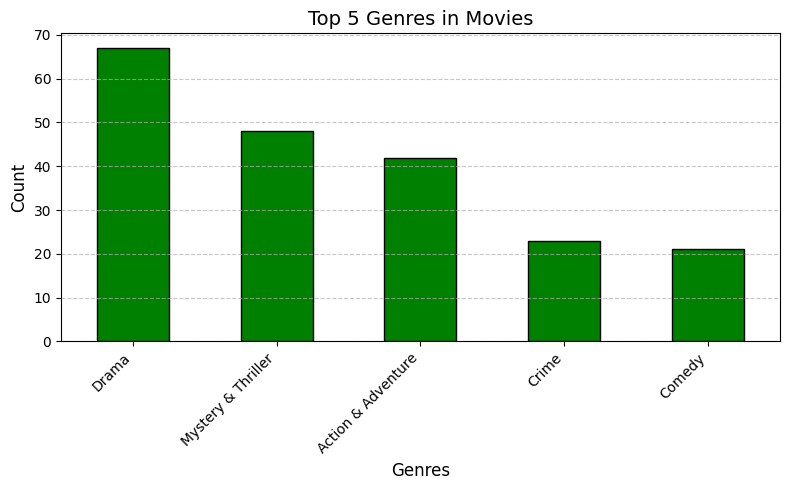

In [ ]:
# Write Your Code here
from wordcloud import WordCloud                                                     # Importing necessary Librarys for Visualization
import matplotlib.pyplot as plt

exploded_movie_genres = []                                                          # Empty list to store all seperated genres

for i in movie_genres:                                                              # Exploding movie genres(since a single Movie can have Multiple Genres) based of ', ' to get much better understanding of frequently occurring Genres
  for j in i.split(', '):
    exploded_movie_genres.append(j)

top_5_movie_genre_counts = pd.Series(exploded_movie_genres).value_counts().head(5)  # Getting the top 5 value with .head method
# print(top_5_movie_genre_counts)

plt.figure(figsize=(8, 5))                                                          # Plotting a Visualiztion Graph
top_5_movie_genre_counts.plot(kind='bar', color='Green', edgecolor='black')
plt.title('Top 5 Genres in Movies', fontsize=14)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



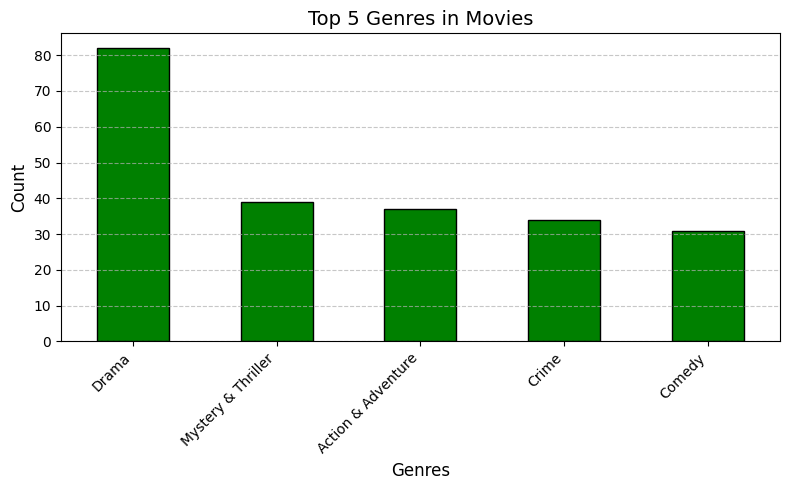

In [ ]:
exploded_show_genres = []                                                        # Empty list to store all seperated genres

for i in tv_show_genre:                                                          # Exploding movie genres(since a single Movie can have Multiple Genres) based of ', ' to get much better understanding of frequently occurring Genres
  for j in i.split(', '):
    exploded_show_genres.append(j)

top_5_show_genre_counts = pd.Series(exploded_show_genres).value_counts().head(5) # Getting the top 5 value with .head method
# print(top_5_show_genre_counts)

plt.figure(figsize=(8, 5))                                                       # Plotting a Visualiztion Graph
top_5_show_genre_counts.plot(kind='bar', color='Green', edgecolor='black')
plt.title('Top 5 Genres in Movies', fontsize=14)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## **Finding Predominant Streaming Service**

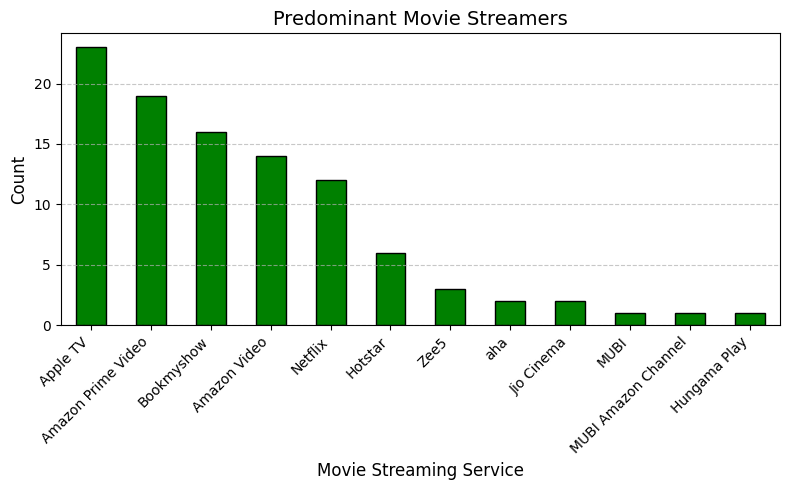

In [ ]:
# Write Your Code here

predominant_movie_streamer = pd.Series(movie_stream_service).value_counts()                  # Getting a count of occurence of each streaming service

plt.figure(figsize = (8,5))                                                                  # Visualizing the occurence to understand which is the most frequently occuring
predominant_movie_streamer.plot(kind = 'bar', color = 'Green', edgecolor = 'black')
plt.title('Predominant Movie Streamers', fontsize=14)
plt.xlabel('Movie Streaming Service', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


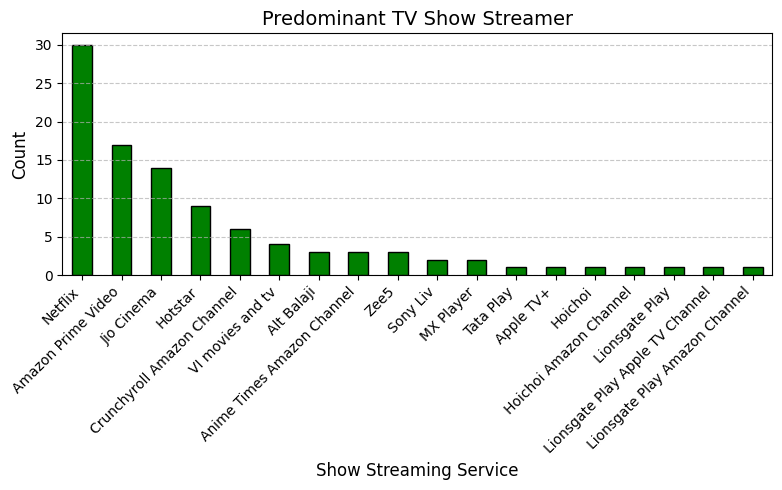

In [ ]:
predominant_show_streamer = pd.Series(tv_show_stream).value_counts()               # Getting a count of occurence of each streaming service

plt.figure(figsize = (8,5))                                                        # Visualizing the occurence to understand which is the most frequently occuring
predominant_show_streamer.plot(kind = 'bar', color = 'Green', edgecolor = 'black')
plt.title('Predominant TV Show Streamer', fontsize=14)
plt.xlabel('Show Streaming Service', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Let's Visvalize it using word cloud


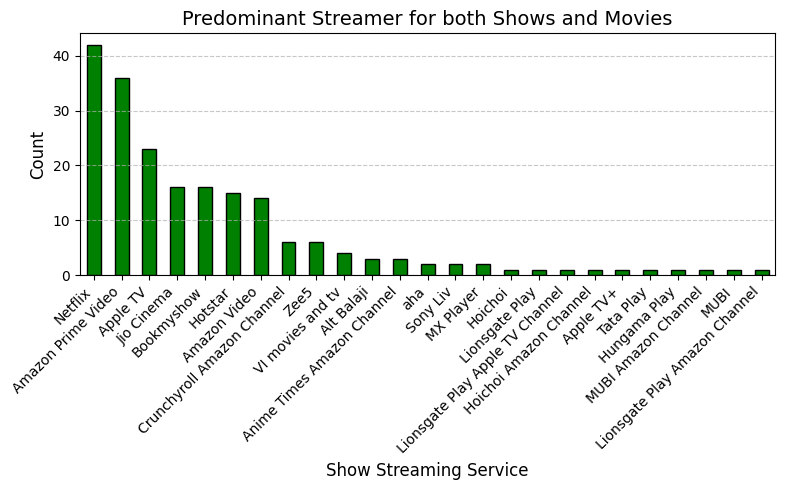

In [ ]:
#Let's Visvalize it using word cloud

streaming_services = movie_stream_service + tv_show_stream                                   # Combining the show streamers and Movie streamer
predominant_streaming_services = pd.Series(streaming_services).value_counts()                # Getting a count of occurence of each streaming service


plt.figure(figsize = (8,5))                                                                  # Visualizing the occurence to understand which is the most frequently occuring
predominant_streaming_services.plot(kind = 'bar', color = 'Green', edgecolor = 'black')
plt.title('Predominant Streamer for both Shows and Movies', fontsize=14)
plt.xlabel('Show Streaming Service', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
movie_info_data.to_csv('Movie Final Data.csv', index = False)
show_info_data.to_csv('TV Show Final Data.csv', index = False)

In [ ]:
#saving filter data as Filter Data in csv format

movie_data_filtered_df.to_csv('Filtered Movie Data.csv', index = False)
show_data_filtered_df.to_csv('Filtered TV Show Data.csv', index = False)

# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***